# Sprawdzenie modelu na testowym dataset


In [27]:
import pathlib
from joblib import load
import pandas as pd
# from fastai.tabular.all import *
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

pathlib.PosixPath = pathlib.WindowsPath

with open(r"random_forest_drowsiness_model.pkl", "rb") as input_file:
    rf = load(input_file)

# nn = load_learner(r"nn_drowsiness_model.pkl")
#
# path = Path(r'E:\Zycie\Szkoła i Studia\Studia\Mechatronika - Studia inżynierskie\Semestr 7\Praca dyplomowa\DatabaseFiles\tabular_database')

test_df = pd.read_csv(r'DatabaseFiles/drozy_dataset.csv', index_col=0)

# Przygotowanie danych

In [28]:
# TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=[0 1] and y_pred=['Drowsy' 'Not_drowsy']. Make sure that the predictions provided by the classifier coincides with the true labels.

def proc_data(df):
    df['Drowsy'] = pd.Categorical(df.Drowsy)
    df = df.drop(columns = ["Sequence_id"])
    df = df.rename(columns={"Drowsy": "Is_drowsy"})
    return df

test_df = proc_data(test_df)
print(test_df.head())

            MAR      Roll     Pitch       EAR Is_drowsy
Frame                                                  
0      0.000000  0.000000  0.000000  0.000000         1
1      0.000000  0.000000  0.000000  0.000000         1
2      0.167645  0.066446  0.743242  0.328903         1
3      0.167985  0.032223  1.716373  0.325983         1
4      0.181395  0.034211  2.610661  0.329403         1


In [29]:
def xs_y(df):
    xs = df[continuous].copy()
    return xs, df[dependant] if dependant in df else None

continuous = ['MAR', 'EAR', 'Roll', 'Pitch']
dependant = 'Is_drowsy'

test_xs, test_y = xs_y(test_df)

# test_dl = nn.dls.test_dl(test_df)

# Testowanie modeli

## Las losowy

In [30]:
preds_rf = rf.predict(test_xs)

preds_rf = [0 if x=="Drowsy" else 1 for x in preds_rf]

from sklearn.metrics import accuracy_score, zero_one_loss

report_rf = classification_report(test_y, preds_rf, target_names=rf.classes_, digits=4, zero_division=0)
print("Raport Klasyfikacji (Random Forest):")
print(report_rf)

Raport Klasyfikacji (Random Forest):
              precision    recall  f1-score   support

      Drowsy     0.2412    0.1147    0.1555     35766
  Not_drowsy     0.8644    0.9399    0.9005    214672

    accuracy                         0.8220    250438
   macro avg     0.5528    0.5273    0.5280    250438
weighted avg     0.7754    0.8220    0.7941    250438



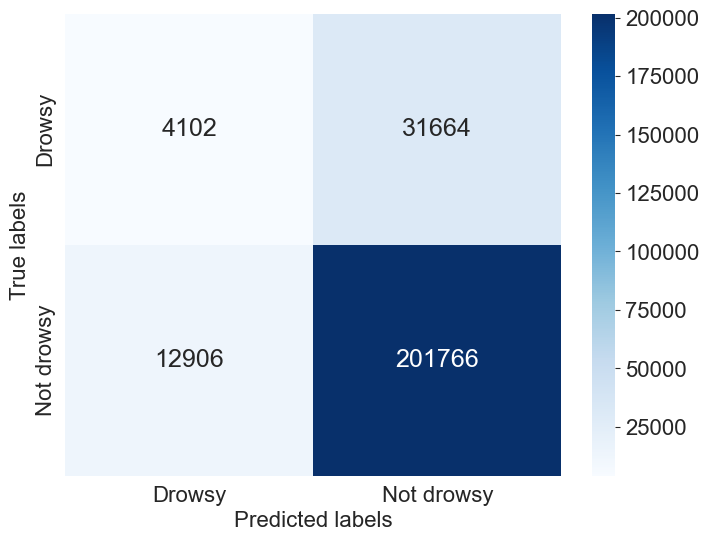

In [31]:
cm_rf = confusion_matrix(test_y, preds_rf)
class_names_polskie = ['Drowsy', 'Not drowsy']

plt.figure(figsize=(8,6))
ax = sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
                 xticklabels=class_names_polskie,
                 yticklabels=class_names_polskie,
                 annot_kws={"size": 18})

ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Predicted labels', fontsize=16)
plt.ylabel('True labels', fontsize=16)

plt.show()

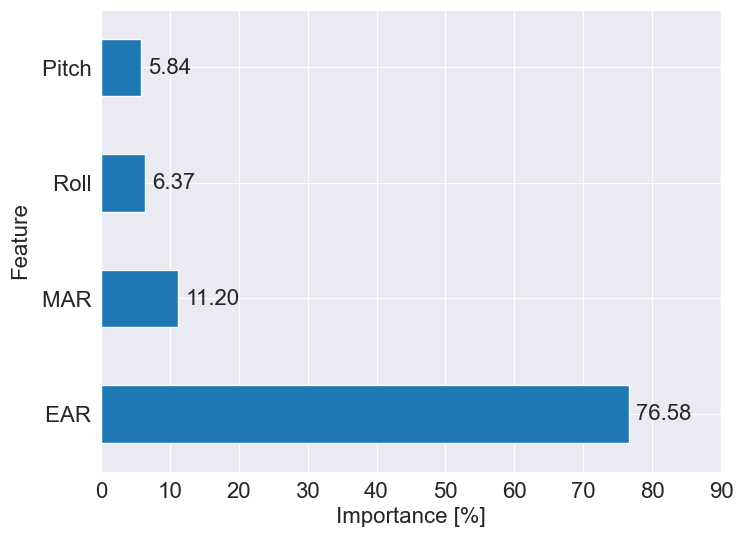

In [19]:
importance = pd.DataFrame(dict(Parameter=test_xs.columns, Importance=rf.feature_importances_*100)).sort_values("Importance", ascending = False)

custom_labels = {
    'Pitch': ' Pitch',
    'Roll': ' Roll',
    'MAR': ' MAR',
    'EAR': ' EAR'
}

importance['Parameter'] = importance['Parameter'].map(custom_labels)

ax = importance.plot(
    x='Parameter', y='Importance', kind='barh', legend=False, figsize=(8, 6)
)

ax.set_xlabel("Importance [%]", fontsize=16)
ax.set_ylabel("Feature", fontsize=16)
ax.tick_params(axis='both', labelsize=16)
ax.bar_label(ax.containers[0], fmt='%.2f', padding=5, fontsize=16)
plt.xlim(0, 90)
plt.show()



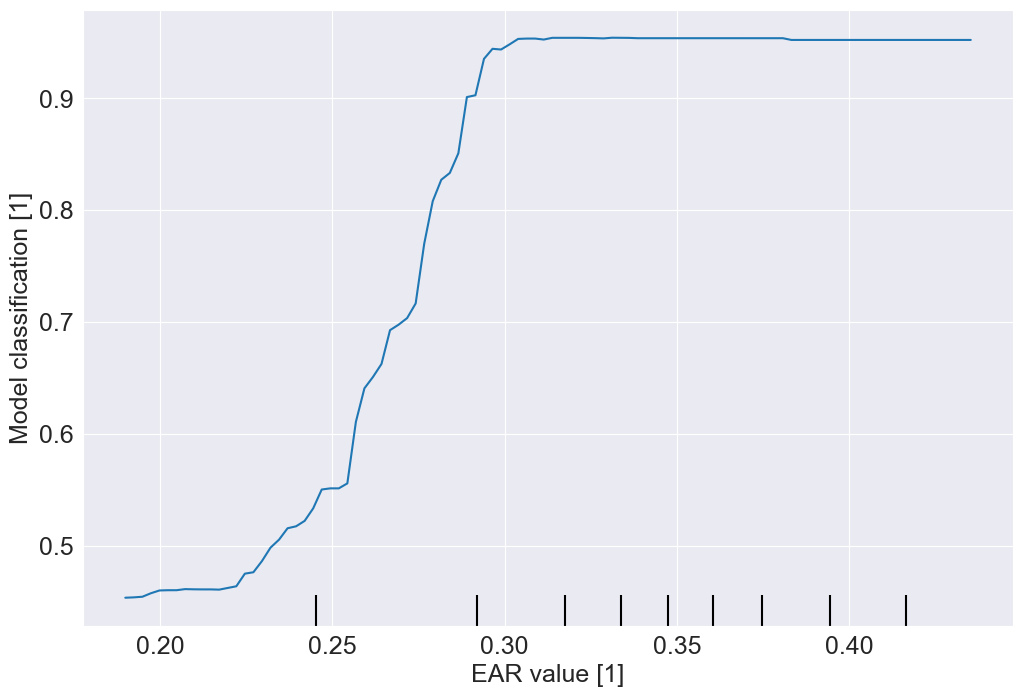

In [7]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 8))

pdp = PartialDependenceDisplay.from_estimator(
    rf,
    test_xs,
    ['EAR'],
    ax=ax,
)

pdp.axes_[0][0].set_ylabel("Model classification [1]",  fontsize=18)
pdp.axes_[0][0].set_xlabel("EAR value [1]",  fontsize=18)
pdp.axes_[0][0].tick_params(axis='both', labelsize=18)
pdp.axes_[0][0].grid(True)
plt.show()


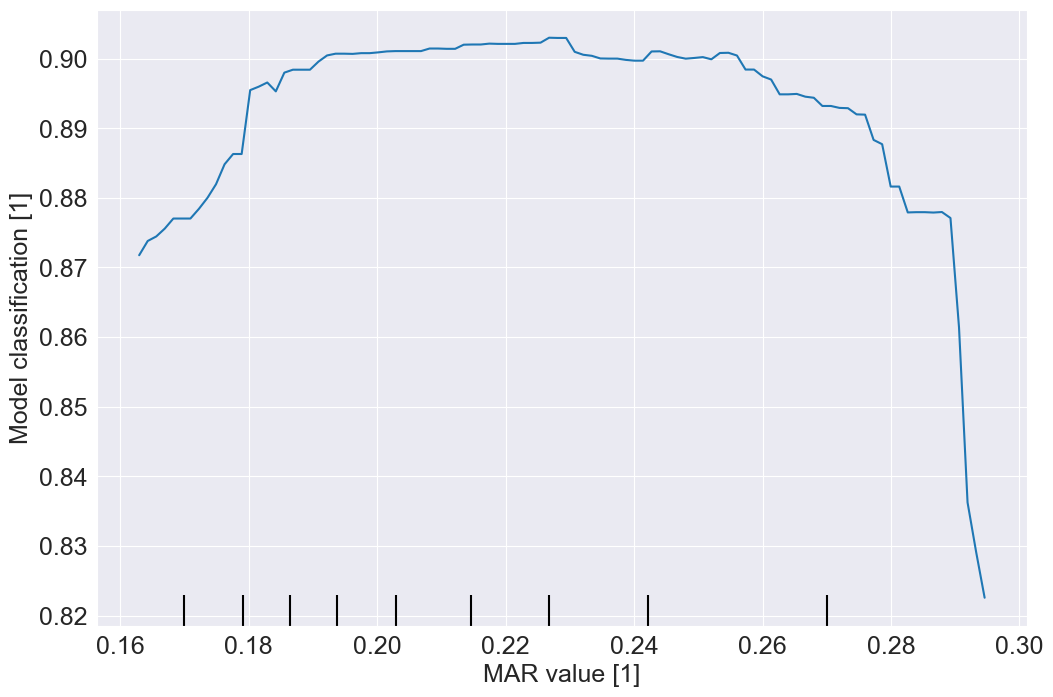

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

pdp = PartialDependenceDisplay.from_estimator(
    rf,
    test_xs,
    ['MAR'],
    ax=ax,
)
pdp.axes_[0][0].set_ylabel("Model classification [1]",  fontsize=18)
pdp.axes_[0][0].set_xlabel("MAR value [1]",  fontsize=18)
pdp.axes_[0][0].tick_params(axis='both', labelsize=18)
pdp.axes_[0][0].grid(True)
plt.show()

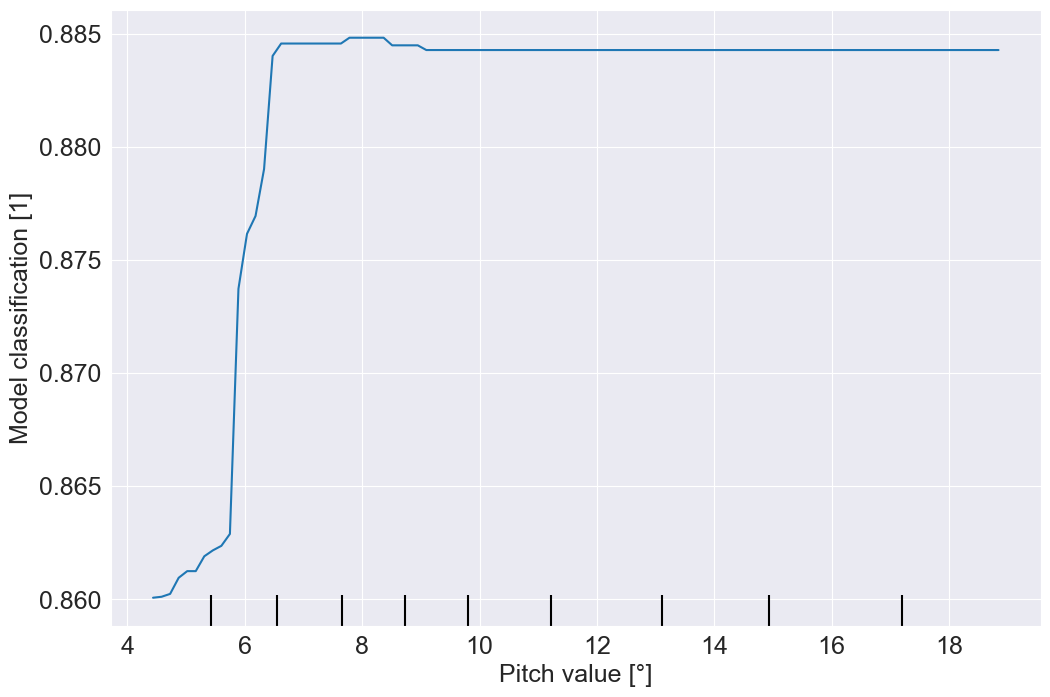

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))

pdp = PartialDependenceDisplay.from_estimator(
    rf,
    test_xs,
    ['Pitch'],
    ax=ax,
)

pdp.axes_[0][0].set_ylabel("Model classification [1]",  fontsize=18)
pdp.axes_[0][0].set_xlabel("Pitch value [°]",  fontsize=18)
pdp.axes_[0][0].tick_params(axis='both', labelsize=18)
pdp.axes_[0][0].grid(True)
plt.show()

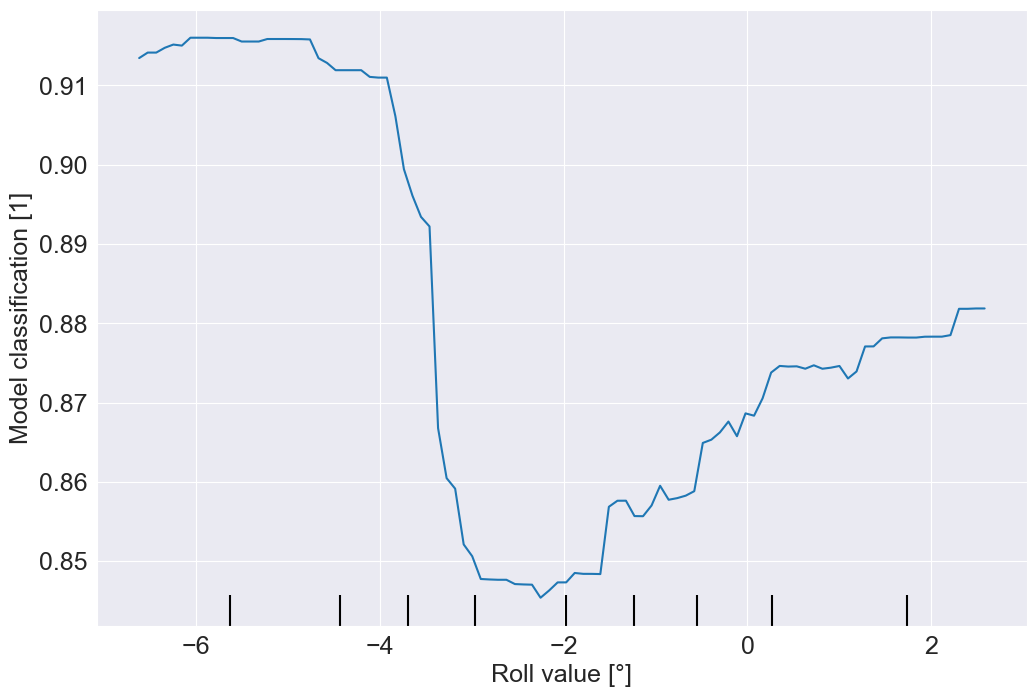

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

pdp = PartialDependenceDisplay.from_estimator(
    rf,
    test_xs,
    ['Roll'],
    ax=ax,
)

pdp.axes_[0][0].set_ylabel("Model classification [1]",  fontsize=18)
pdp.axes_[0][0].set_xlabel("Roll value [°]",  fontsize=18)
pdp.axes_[0][0].tick_params(axis='both', labelsize=18)
pdp.axes_[0][0].grid(True)
plt.show()

## Sieć neuronowa

In [45]:
# preds, targets = nn.get_preds(dl=test_dl)
# preds_nn = preds.argmax(dim=1).cpu().numpy()
# targets_np = targets.cpu().numpy()
# report = classification_report(targets_np, preds_nn, digits=4)
#
# print("Classification Report:")
# print(report)

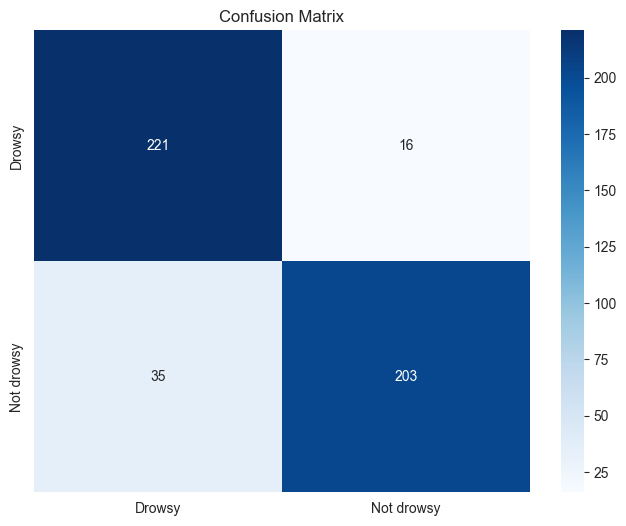

In [24]:
# cm_nn = confusion_matrix(targets_np, preds_nn)
# plt.figure(figsize=(8,6))
# sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
#             xticklabels=class_names_polskie,
#             yticklabels=class_names_polskie)
#
# plt.title('Confusion Matrix')
# plt.show()